# Proficiency Test
Stella Linda Cyrilla

# 3. Exploratory Data Analysis

## Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSV Dataset from URLs

In [45]:
#URLs
url_1="https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2018.csv"
url_2="https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2019.csv"
url_3="https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2020.csv"

#convert CSV into dataframes
df_1=pd.read_csv(url_1)
df_2=pd.read_csv(url_2)
df_3=pd.read_csv(url_3)

#Rows and columns for each dataframes
print("CSV 1\nRows: %d and Columns: %d \n" %df_1.shape)
print("CSV 2\nRows: %d and Columns: %d \n" %df_2.shape)
print("CSV 3\nRows: %d and Columns: %d \n" %df_3.shape)

CSV 1
Rows: 98888 and Columns: 17 

CSV 2
Rows: 19782 and Columns: 17 

CSV 3
Rows: 70894 and Columns: 17 



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Merge the Dataframes

In [46]:
#merge multiple dataframes into a new dataframe
df=pd.concat([df_1,df_2,df_3])

#calculate total rows and columns in new dataframe
print("Total Rows: %d and Total Columns: %d \n" %df.shape)

Total Rows: 189564 and Total Columns: 17 



## Cleaning Dataset

### Remove Duplicates

In [47]:
#Remove Duplicates
df=df.drop_duplicates()
print('Number of rows and columns after remove the duplicates: ',df.shape,'\n')
df.head(5)

Number of rows and columns after remove the duplicates:  (189403, 17) 



,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


### Handling Missing Values

Check missing (null) values from each column

In [48]:
print('Missing values from each column:')
df.isnull().sum()

Missing values from each column:


INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     90676
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING               98408
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1611
Lat                     6421
Long                    6421
Location                   0
dtype: int64

### 'SHOOTING' and 'UCR_PART' column

We can remove 'SHOOTING' and 'UCR_PART' column since the columns doesn't provide important informations.

In [49]:
df=df.drop(['SHOOTING','UCR_PART'],axis=1)
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


### Filing 'OFFENSE_CODE_GROUP' missing values

'OFFENSE_CODE_GROUP' seems to be paired with 'OFFENSE_CODE'. So, we'll fill missing values at 'OFFENSE_CODE_GROUP' based on their 'OFFENSE_CODE'.

In [50]:
#Create df_offense to be merged with df for filling missing values on offense_code_group
df_offense=df[['OFFENSE_CODE','OFFENSE_CODE_GROUP']]
df_offense=df_offense.dropna()
df_offense=df_offense.drop_duplicates()
df=df.merge(df_offense,on='OFFENSE_CODE',how='left')

In [51]:
df['OFFENSE_CODE_GROUP_x']=df['OFFENSE_CODE_GROUP_y']
df.rename(columns = {'OFFENSE_CODE_GROUP_x':'OFFENSE_CODE_GROUP'}, inplace = True)
df.drop('OFFENSE_CODE_GROUP_y', axis=1, inplace=True)
df.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP     6036
OFFENSE_DESCRIPTION       0
DISTRICT               1037
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                 1611
Lat                    6421
Long                   6421
Location                  0
dtype: int64

Check Remaining Offense_Code_Group based on the Offense_Code

In [52]:
df_missed=df[df['OFFENSE_CODE_GROUP'].isnull()]
df_missed.OFFENSE_CODE.value_counts()

3005     5236
3126      455
641       115
2671       94
531        62
736        36
3300       11
3100        4
2950        3
400         3
3200        3
300         2
500         2
1400        2
800         2
600         1
99999       1
1500        1
1800        1
990         1
2600        1
Name: OFFENSE_CODE, dtype: int64

We could see that some of OFFENSE_CODE (e.g. 3005, 3126, 641, etc.) have pretty much records, so we couldn't ignore these records. It would be better if we try to fill OFFENSE_CODE_GROUP based on OFFENSE_DESCRIPTION.

In [53]:
#check existing offense_code_group name list
df.OFFENSE_CODE_GROUP.unique()

array(['Investigate Person', 'Larceny', 'Harassment', 'Property Lost',
       'Fraud', 'Auto Theft', 'Counterfeiting', 'Confidence Games',
       'Commercial Burglary', 'Vandalism', 'Other',
       'Missing Person Reported', 'Police Service Incidents',
       'License Plate Related Incidents', 'Residential Burglary',
       'Simple Assault', 'Property Found', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Motor Vehicle Accident Response',
       'Aggravated Assault', 'Landlord/Tenant Disputes',
       'Investigate Property', 'Auto Theft Recovery',
       'Missing Person Located', 'Embezzlement', 'Violations',
       'Criminal Harassment', 'Disorderly Conduct', 'Warrant Arrests',
       'Other Burglary', 'Restraining Order Violations',
       'Recovered Stolen Property', 'Service', 'Property Related Damage',
       'Robbery', 'Towed', 'Evading Fare', 'License Violation',
       'Verbal Disputes', 'Fire Related Reports', 'Firearm Violations',
       'Search Warrants', 'Opera

In [54]:
df_missed=df_missed[['OFFENSE_CODE','OFFENSE_DESCRIPTION']]
df_missed=df_missed.drop_duplicates()
df_missed

,OFFENSE_CODE,OFFENSE_DESCRIPTION
98747,3005,SICK ASSIST
99388,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT
99519,531,BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO ...
99583,2671,VIOLATION - HARASSMENT PREVENTION ORDER
99607,641,BREAKING AND ENTERING (B&E) MOTOR VEHICLE
107169,736,RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN ...
118403,3100,Migrated Report - Investigate Property
118404,3200,Migrated Report - Investigate Person
118405,3300,Migrated Report - Other Part III
118406,1400,Migrated Report - Vandalism/Destruction of Pro...


Fill OFFENSE_CODE_GROUP missing values which the OFFENSE_CODE have pretty much records

In [55]:
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].fillna(df['OFFENSE_CODE'].map({ \
                            3005:'Sick Assist', 3126:'Warrant Arrests',531:'Breaking and Entering (B&E) Motor Vehicle', \
                            641:'Breaking and Entering (B&E) Motor Vehicle',2671:'Violations', \
                            990: 'Justifiable Homicide'}))
df.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP       73
OFFENSE_DESCRIPTION       0
DISTRICT               1037
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                 1611
Lat                    6421
Long                   6421
Location                  0
dtype: int64

### Filling Latitude and Longitude Missing Values

The 'Location' column contains latitude and longitude values. Also, it doesn't have any missing value, so we can take the location values to fill the 'Lat' and 'Long' missing values.

In [56]:
#make temporary column for latitude and longitude, and get the values from Location column by splitting the column
df[['Lat_2','Long_2']]=df.Location.str.split(",",expand=True,)
df[['Lat_2']]=df['Lat_2'].map(lambda x: x.lstrip(' (')).astype(float)
df[['Long_2']]=df['Long_2'].map(lambda x: x.rstrip(') ')).astype(float)

#filling the missing values
df['Lat']=df['Lat'].fillna(df['Lat_2'])
df['Long']=df['Long'].fillna(df['Long_2'])

#remove the temporary columns
df.drop(['Lat_2','Long_2'], axis=1, inplace=True)
df.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP       73
OFFENSE_DESCRIPTION       0
DISTRICT               1037
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                 1611
Lat                       0
Long                      0
Location                  0
dtype: int64

### Remove Remaining Rows with Missing Values in District and OFFENSE_CODE_GROUP

In [57]:
df=df.dropna(subset=['DISTRICT','OFFENSE_CODE_GROUP'])
df.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                  0
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                 1232
Lat                       0
Long                      0
Location                  0
dtype: int64

### Check Data Types

In [58]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

## Download Cleaned Dataset (CSV Form)

In [35]:
df.to_csv('cleaned_dataset.csv')

## Other Insight

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


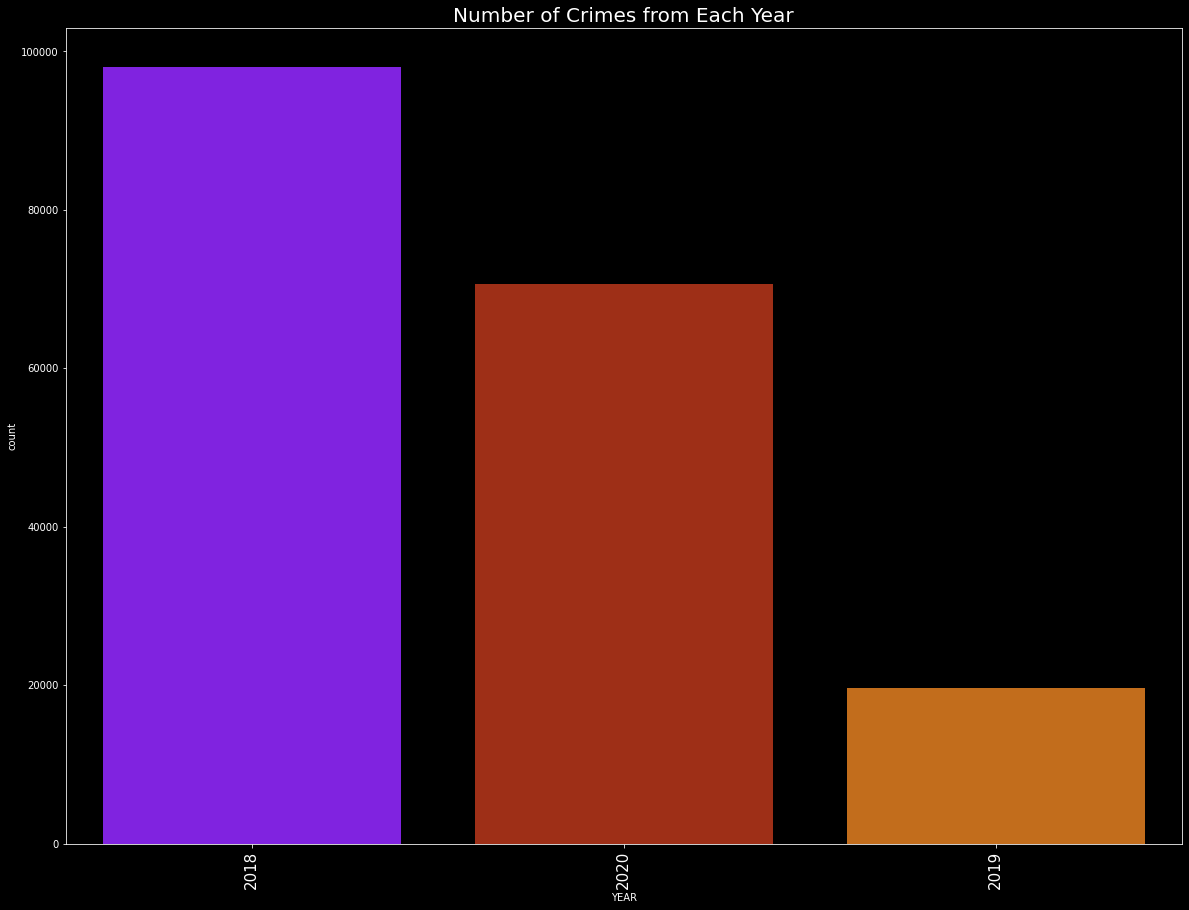

In [59]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('dark_background')

sns.countplot(df['YEAR'], order=df['YEAR'].value_counts().nlargest(25).index,palette = 'gnuplot')

plt.title('Number of Crimes from Each Year', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.show()

# 5. Python

## Distrik dengan angka tindak kriminal tertinggi

In [60]:
#make a copied dataframe (df_new) so the original df doesn't change
df_2 = df.copy(deep=True)
df_2['district_mod']=df_2['DISTRICT'].str[:1]
df_2.district_mod.value_counts().head(1)

B    50302
Name: district_mod, dtype: int64

## 3 jenis tindak kriminal yang terjadi pada tahun 2020 namun tidak terjadi di tahun 2019

In [ ]:
crime_2019=df.loc[df['YEAR'] == 2019]
crime_2020=df.loc[df['YEAR'] == 2020]
crime_2019=crime_2019.OFFENSE_DESCRIPTION.unique()
crime_2020=crime_2020.OFFENSE_DESCRIPTION.unique()

crime_result=[]
for crime in crime_2020:
  if crime not in crime_2019:
    crime_result.append(crime)

print(crime_result)

['TRUANCY / RUNAWAY', 'EXPLOSIVES - POSSESSION OR USE', 'OBSCENE PHONE CALLS', 'EXPLOSIVES - TURNED IN OR FOUND', 'Justifiable Homicide']


## Kelompok tindak kriminal yang paling banyak terjadi pada minggu ke 40-45

In [ ]:
df_2['OCCURRED_ON_DATE'] = pd.to_datetime(df_2['OCCURRED_ON_DATE'], format='%Y-%m-%d %H:%M:%S')
df_2['Week_Number'] = df_2['OCCURRED_ON_DATE'].dt.strftime('%U').astype(int)

df_week=df_2[df_2.Week_Number>=40]
df_week=df_week[df_week.Week_Number<=45]
df_week.OFFENSE_CODE_GROUP.value_counts().head(1)

Motor Vehicle Accident Response    3696
Name: OFFENSE_CODE_GROUP, dtype: int64

## Distrik yang memiliki jumlah tindak kriminal terkecil di akhir pekan

In [ ]:
df_weekend=df_2[(df_2.DAY_OF_WEEK=='Saturday')|(df_2.DAY_OF_WEEK=='Sunday')]
df_weekend.district_mod.value_counts().tail(1)

E    7637
Name: district_mod, dtype: int64

## Distrik yang memiliki jumlah tindak kriminal terbanyak di hari kerja

In [ ]:
df_weekday=df_2[(df_2.DAY_OF_WEEK!='Saturday')&(df_2.DAY_OF_WEEK!='Sunday')]
df_weekday.district_mod.value_counts().head(1)

B    37100
Name: district_mod, dtype: int64

# 6. Machine Learning

## Import Sklearn Libraries

In [142]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn import linear_model

## Feature Selection

In [147]:
#district
df_ml=df.copy(deep=True)
df_ml['DISTRICT'] = df_ml['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12,
    'External':13
})

In [148]:
#Offense_Code
df_ml['OFFENSE_CODE_GROUP'] = df_ml['OFFENSE_CODE_GROUP'].map({
'Investigate Person':1,
'Larceny':2,
'Harassment':3,
'Property Lost':4,
'Fraud':5,
'Auto Theft':6,
'Counterfeiting':7,
'Confidence Games':8,
'Commercial Burglary':9,
'Vandalism':10,
'Other':11,
'Missing Person Reported':12,
'Police Service Incidents':13,
'License Plate Related Incidents':14,
'Residential Burglary':15,
'Simple Assault':16,
'Property Found':17,
'Larceny From Motor Vehicle':18,
'Medical Assistance':19,
'Motor Vehicle Accident Response':20,
'Aggravated Assault':21,
'Landlord/Tenant Disputes':22,
'Investigate Property':23,
'Auto Theft Recovery':24,
'Missing Person Located':25,
'Embezzlement':26,
'Violations':27,
'Criminal Harassment':28,
'Disorderly Conduct':29,
'Warrant Arrests':30,
'Other Burglary':31,
'Restraining Order Violations':32,
'Recovered Stolen Property':33,
'Service':34,
'Property Related Damage':35,
'Robbery':36,
'Towed':37,
'Evading Fare':38,
'License Violation':39,
'Verbal Disputes':40,
'Fire Related Reports':41,
'Firearm Violations':42,
'Search Warrants':43,
'Operating Under the Influence':44,
'Drug Violation':45,
'Prisoner Related Incidents':46,
'Firearm Discovery':47,
'Ballistics':48,
'Liquor Violation':49,
'Homicide':50,
'Offenses Against Child / Family':51,
'Arson':52,
'Assembly or Gathering Violations':53,
'Harbor Related Incidents':54,
'Bomb Hoax':55,
'Aircraft':56,
'Phone Call Complaints':57,
'Prostitution':58,
'HUMAN TRAFFICKING':59,
'HOME INVASION':60,
'Explosives':61,
'Sick Assist':62,
'Breaking and Entering (B&E) Motor Vehicle':63,
'Justifiable Homicide':64
})

In [149]:
#split dataset in features and target variable
le = preprocessing.LabelEncoder()
le.fit(["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"])
df_ml['DAY_OF_WEEK']=le.transform(df_ml['DAY_OF_WEEK'])
df_ml['DAY_OF_WEEK']


feature_cols = ['YEAR','MONTH', 'DAY_OF_WEEK','OFFENSE_CODE_GROUP','DISTRICT']
X = df_ml[feature_cols] # Features
y = df_ml['HOUR'] # Target variable

## Splitting Dataset

In [150]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Regresison Model

In [151]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
regr.predict(X_test)
regr.score(X_test,y_test)

0.0010453828028405

In [154]:
predictedHour = regr.predict([[2020,6,4,10,6]])

print(predictedHour)

[12.77408822]
